✅ Model trained successfully
📉 Mean Squared Error (MSE): 35.38
📈 R² Score: 0.9999


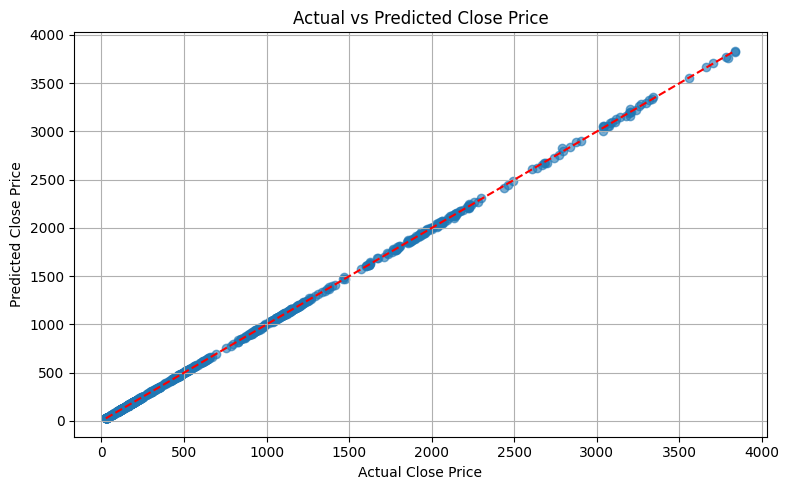

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # Ensure correct datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)

    # Feature engineering
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

    # Drop rows with any missing values
    df.dropna(inplace=True)

    return df

def train_model(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"✅ Model trained successfully")
    print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
    print(f"📈 R² Score: {r2:.4f}")

    return model, scaler, X_test, y_test, y_pred

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Close Price")
    plt.ylabel("Predicted Close Price")
    plt.title("Actual vs Predicted Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    df = load_and_prepare_data("TCS_stock_history.csv")

    features = ['Open', 'High', 'Low', 'Volume', 'Day', 'Month', 'Year']
    target = 'Close'

    X = df[features]
    y = df[target]

    model, scaler, X_test, y_test, y_pred = train_model(X, y)

    plot_predictions(y_test, y_pred)

if __name__ == "__main__":
    main()
